In [1]:
cd G:\dd-resource\slides\homework\ML\HW4

G:\dd-resource\slides\homework\ML\HW4


# This is an implemetation of Cross Validation And L2 Regularization.

the best log(lambda) chosen from 11-fold is:  4.09605589407
the loss get from model get in q1 is:  0.0371246757612
Variable with the largest coef is:  PctIlleg 0.0584191934135
Variable with the smallest coef is:  PctKids2Par -0.0451630130655


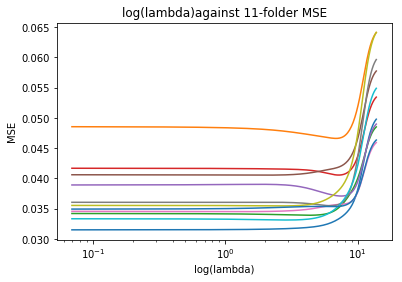

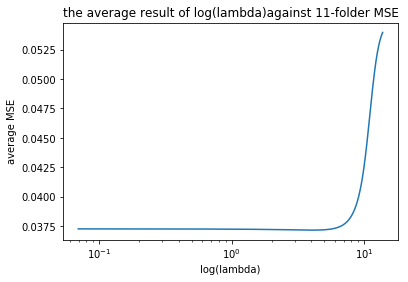

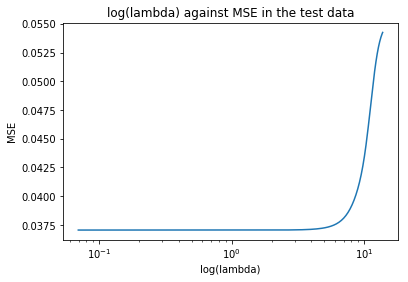

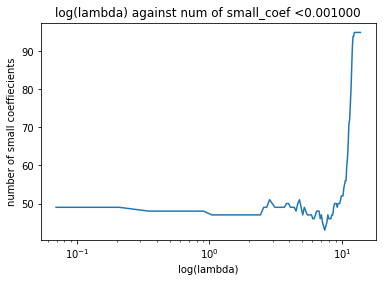

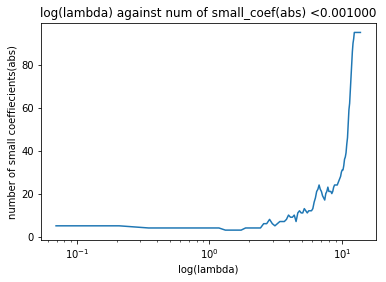

In [3]:
import pandas as pd
import pylab
from pylab import *
from sklearn.linear_model import Ridge
import matplotlib.pyplot as plt
import numpy as np

def ridge_regression(X,y):
    clf = Ridge()
    coefs = []
    errors = []
    m,n=X.shape
    alphas = np.logspace(-6, 6, 200)

    # Train the model with different regularisation strengths
    for a in alphas:
        clf.set_params(alpha=a)
        clf.fit(X, y)
        coefs.append(clf.coef_)
        # errors.append(mean_squared_error(clf.coef_, w))
        y_predict = X.dot(clf.coef_)
        MSE = 0.5 * sum([(y_predict[i] - y[i]) ** 2 for i in range(m)]) / m
        errors.append(MSE)

    # # Display results
    # plt.figure(figsize=(20, 6))
    #
    # plt.subplot(121)
    # ax = plt.gca()
    # ax.plot(np.log(alphas), coefs)
    # ax.set_xscale('log')
    # plt.xlabel('log(lambda)')
    # plt.ylabel('weights')
    # plt.title('Ridge coefficients as a function of the regularization')
    # plt.axis('tight')
    #
    # plt.subplot(122)
    # ax = plt.gca()
    # ax.plot(np.log(alphas), errors)
    # ax.set_xscale('log')
    # plt.xlabel('log(lambda)')
    # plt.ylabel('error')
    # plt.title('Coefficient error as a function of the regularization')
    # plt.axis('tight')
    #
    # plt.show()
    return alphas,errors

def npmin(array):
    arrayindex = array.argmin(1)
    arrayvalue = array.min(1)
    i = arrayvalue.argmin()
    j = arrayindex[i]
    return i, j

def k_fold_with_ridge_regression(partions):
    # partion is list
    clf = Ridge()
    alphas = np.logspace(-6, 6, 200)
    k = len(partions)
    Errors=[]
    Average_curve=[]
    Coefs = []
    for a in alphas:
        clf.set_params(alpha=a)
        errors=[]
        coefs=[]
        for i in range(0, k):
            if i==0:
                train_data = partions[1:k]
                test_data = partions[0]
            elif (i == k-1):
                train_data =partions[0:k-1]
                test_data = partions[k-1]
            else:
                train_data = np.concatenate((partions[0:i],partions[i+1:k]),axis=0)
                test_data = partions[i]

            train_data = np.reshape(train_data, (-1, 96))
            m1, n1 = train_data.shape
            m2, n2 = test_data.shape
            X_train, y_train = train_data[:m1, 1:n1], train_data[:m1, 0]
            X_test, y_test = test_data[:m2, 1:n2], test_data[:m2, 0]

            clf.fit(X_train, y_train)
            y_predict = X_test.dot(clf.coef_)
            MSE = 0.5 * sum([(y_predict[i] - y_test[i]) ** 2 for i in range(m2)]) / m2
            errors.append(MSE)
            coefs.append(clf.coef_)

        Coefs.append(np.asarray(coefs))
        Errors.append(np.asarray(errors))

    figure(1)
    ax = plt.gca()
    ax.plot(np.log(alphas), Errors)
    ax.set_xscale('log')
    plt.xlabel('log(lambda)')
    plt.ylabel('MSE')
    plt.title('log(lambda)against 11-folder MSE')
    plt.axis('tight')


    Err_arr = np.asarray(Errors)
    Average_curve = np.average(Err_arr,1)

    # average result
    figure(0)
    ax = plt.gca()
    ax.plot(np.log(alphas), Average_curve)
    ax.set_xscale('log')
    plt.xlabel('log(lambda)')
    plt.ylabel('average MSE')
    plt.title('the average result of log(lambda)against 11-folder MSE')
    plt.axis('tight')


    i,j = npmin(Err_arr) # k=i, lambda= alphas[j]
    Coefs_arr = np.asarray(Coefs)
    # print("Co shape is: ",Coefs_arr.shape)
    # print(Err_arr.shape)
    index = np.argmin(Average_curve)
    best_lambda = alphas[index]

    best_coef = Coefs[i][j]
    # best_lambda = alphas[i]

    return best_coef, best_lambda


def traintest_function(train_data,test_data):
    clf = Ridge()
    coefs = []
    errors = []
    alphas = np.logspace(-6, 6, 200)
    m1,n1=train_data.shape
    m2, n2 = test_data.shape
    X_train = train_data[:m1, 1:n1]
    y_train = train_data[:m1,0]
    X_test = train_data[:m2, 1:n2]
    y_test = train_data[:m2, 0]
    # Train the model with different regularisation strengths
    for a in alphas:
        clf.set_params(alpha=a)
        clf.fit(X_train, y_train)
        coefs.append(clf.coef_)
        # errors.append(mean_squared_error(clf.coef_, w))
        y_predict = X_test.dot(clf.coef_)
        MSE = 0.5 * sum([(y_predict[i] - y_test[i]) ** 2 for i in range(m2)]) / m2
        errors.append(MSE)

    err_arr = np.asarray(errors)
    coefs_arr = np.asarray(coefs)
    # print(err_arr.shape)
    min_lam_index = np.argmin(err_arr)  # k=i, lambda= alphas[j]
    best_loss = err_arr[min_lam_index]
    best_coef = coefs_arr[min_lam_index]
    min_coef_index = np.argmin(best_coef)
    max_coef_index = np.argmax(best_coef)

    figure(2)
    ax = plt.gca()
    ax.plot(np.log(alphas), errors)
    ax.set_xscale('log')
    plt.xlabel('log(lambda)')
    plt.ylabel('MSE')
    plt.title('log(lambda) against MSE in the test data')
    plt.axis('tight')

    return best_coef,best_loss,min_coef_index, max_coef_index

def new_model(train_data,test_data,lamb):
    clf = Ridge()
    m1, n1 = train_data.shape
    m2, n2 = test_data.shape
    X_train = train_data[:m1, 1:n1]
    y_train = train_data[:m1, 0]
    X_test = train_data[:m2, 1:n2]
    y_test = train_data[:m2, 0]
    clf.set_params(alpha=lamb)
    clf.fit(X_train, y_train)
    # errors.append(mean_squared_error(clf.coef_, w))
    y_predict = X_test.dot(clf.coef_)
    MSE = 0.5 * sum([(y_predict[i] - y_test[i]) ** 2 for i in range(m2)]) / m2

    return clf.coef_, MSE


def plot_small_coefficients(train_data,test_data,threhold):
    clf = Ridge()
    coefs = []
    errors = []
    number=[]
    number2=[]
    alphas = np.logspace(-6, 6, 200)
    m1, n1 = train_data.shape
    m2, n2 = test_data.shape
    X_train = train_data[:m1, 1:n1]
    y_train = train_data[:m1, 0]
    # Train the model with different regularisation strengths
    for a in alphas:
        clf.set_params(alpha=a)
        clf.fit(X_train, y_train)
        number.append(np.sum(clf.coef_<threhold))
        number2.append(np.sum(abs(clf.coef_) < threhold))

    figure(3)
    ax = plt.gca()
    ax.plot(np.log(alphas), number)
    ax.set_xscale('log')
    plt.xlabel('log(lambda)')
    plt.ylabel('number of small coeffiecients')
    plt.title('log(lambda) against num of small_coef <%f' % threhold)
    plt.axis('tight')

    figure(4)
    ax = plt.gca()
    ax.plot(np.log(alphas), number2)
    ax.set_xscale('log')
    plt.xlabel('log(lambda)')
    plt.ylabel('number of small coeffiecients(abs)')
    plt.title('log(lambda) against num of small_coef(abs) <%f' % threhold)
    plt.axis('tight')



if __name__ == '__main__':
    df_train = pd.read_table("crime-train.txt") # type is frame
    train_arr = df_train.values
    np.random.shuffle(train_arr)

    df_test = pd.read_table("crime-test.txt")
    test_arr = df_test.values

    partions = np.array_split(train_arr,11)

    best_coef, best_lambda=k_fold_with_ridge_regression(partions)

    print("the best log(lambda) chosen from 11-fold is: ", np.log(best_lambda))

    # this function is used before change the homework, now is no use
    coef, loss, smallest_coef,largest_coef = traintest_function(train_arr,test_arr)

    final_coef,final_MSE = new_model(train_arr,test_arr,best_lambda)

    print("the loss get from model get in q1 is: ",final_MSE)
    # print("the loss without k-fold is: ", loss)

    min_coef_index = np.argmin(final_coef)
    max_coef_index = np.argmax(final_coef)
    print("Variable with the largest coef is: ", df_train.columns.tolist()[max_coef_index + 1],final_coef[max_coef_index] )
    print("Variable with the smallest coef is: ", df_train.columns.tolist()[min_coef_index + 1],final_coef[min_coef_index])
    #
    # print("Variable PctKids2Par's coef is: ", final_coef[39])
    # print("Variable PctIlleg's coef is: ", final_coef[45])
    # print("Variable PersPerOccupHous's coef is: ", final_coef[59])

    threhold = 1e-3

    plot_small_coefficients(train_arr,test_arr,threhold)

    figure(1)
    savefig('log(lambda)against11-folderMSE')
    figure(0)
    savefig('averageoflog(lambda)against11-folderMSE')
    figure(2)
    savefig('log(lambda)againstMSEinthetestdata')
    figure(3)
    savefig('log(lambda)againstnumofsmallcoef')
    figure(4)
    savefig('log(lambda)againstnumofsmallcoef(abs)')
    pylab.show()